In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [185]:
dataset_train = pd.read_csv('PowerAep2.csv')
training_set = dataset_train.iloc[:,1:2].values
print(dataset_train)

              Datetime  AEP_MW
0      12/31/2004 1:00   13478
1      12/31/2004 2:00   12865
2      12/31/2004 3:00   12577
3      12/31/2004 4:00   12517
4      12/31/2004 5:00   12670
5      12/31/2004 6:00   13038
6      12/31/2004 7:00   13692
7      12/31/2004 8:00   14297
8      12/31/2004 9:00   14719
9     12/31/2004 10:00   14941
10    12/31/2004 11:00   15184
11    12/31/2004 12:00   15009
12    12/31/2004 13:00   14808
13    12/31/2004 14:00   14522
14    12/31/2004 15:00   14349
15    12/31/2004 16:00   14107
16    12/31/2004 17:00   14410
17    12/31/2004 18:00   15174
18    12/31/2004 19:00   15261
19    12/31/2004 20:00   14774
20    12/31/2004 21:00   14363
21    12/31/2004 22:00   14045
22    12/31/2004 23:00   13478
23       1/1/2005 0:00   12892
24     12/30/2004 1:00   14097
25     12/30/2004 2:00   13667
26     12/30/2004 3:00   13451
27     12/30/2004 4:00   13379
28     12/30/2004 5:00   13506
29     12/30/2004 6:00   14121
...                ...     ...
2005   1

In [ ]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[1974])


In [187]:
x_train = []
y_train = []
for i in range(60,2035):
    x_train.append(training_set_scaled[i-60:i, 0])
    #y_train.append(training_set_scaled[i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train[0])
#print(x_train[1])
#print(y_train[0])
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
#print(x_train)
print(x_train.shape[1])


[0.26108494 0.21130421 0.18791619 0.18304369 0.19546857 0.22535326
 0.27846354 0.32759461 0.36186454 0.3798928  0.39962644 0.38541497
 0.36909209 0.34586649 0.33181744 0.31216502 0.33677115 0.39881436
 0.40587949 0.36633101 0.33295436 0.3071301  0.26108494 0.21349683
 0.31135293 0.27643333 0.25889232 0.25304531 0.26335878 0.31330193
 0.39004385 0.44729576 0.46970927 0.48578853 0.49650804 0.47709924
 0.45663472 0.42553191 0.40141303 0.38866331 0.39775865 0.47279519
 0.50714634 0.49074224 0.48400195 0.4602891  0.40149423 0.32913757
 0.40279357 0.36283904 0.34432353 0.33855774 0.34659737 0.39174923
 0.46735423 0.54450219 0.55920091 0.56829625 0.56285529 0.54799415]
60


In [ ]:
model = Sequential()
model.add(LSTM(units = 128, return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 32))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 350,batch_size = 32)

Epoch 1/350
1975/1975 [==============================] - 59s 30ms/step - loss: 0.0349
Epoch 2/350
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0222
Epoch 3/350
1975/1975 [==============================] - 34s 17ms/step - loss: 0.0209
Epoch 4/350
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0185
Epoch 5/350
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0158
Epoch 6/350
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0134
Epoch 7/350
1975/1975 [==============================] - 33s 17ms/step - loss: 0.0133
Epoch 8/350
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0129
Epoch 9/350
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0113
Epoch 10/350
1975/1975 [==============================] - 31s 16ms/step - loss: 0.0111
Epoch 11/350
1975/1975 [==============================] - 32s 16ms/step - loss: 0.0102
Epoch 12/350
1975/1975 [============================

In [200]:
dataset_test = pd.read_csv('PowerTest.csv')
print(dataset_train)
actual_power = dataset_test.iloc[:,1:2].values
dataset_total = pd.concat((dataset_train['AEP_MW'],dataset_test['AEP_MW']),axis = 0)
#print(dataset_total)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
#print(inputs)
x_test = []
for i in range (60,76):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#print(x_test)
predicted_power = model.predict(x_test)
pedicted_power = sc.inverse_transform(predicted_power)
#print(predicted_stock)

              Datetime  AEP_MW
0      12/31/2004 1:00   13478
1      12/31/2004 2:00   12865
2      12/31/2004 3:00   12577
3      12/31/2004 4:00   12517
4      12/31/2004 5:00   12670
5      12/31/2004 6:00   13038
6      12/31/2004 7:00   13692
7      12/31/2004 8:00   14297
8      12/31/2004 9:00   14719
9     12/31/2004 10:00   14941
10    12/31/2004 11:00   15184
11    12/31/2004 12:00   15009
12    12/31/2004 13:00   14808
13    12/31/2004 14:00   14522
14    12/31/2004 15:00   14349
15    12/31/2004 16:00   14107
16    12/31/2004 17:00   14410
17    12/31/2004 18:00   15174
18    12/31/2004 19:00   15261
19    12/31/2004 20:00   14774
20    12/31/2004 21:00   14363
21    12/31/2004 22:00   14045
22    12/31/2004 23:00   13478
23       1/1/2005 0:00   12892
24     12/30/2004 1:00   14097
25     12/30/2004 2:00   13667
26     12/30/2004 3:00   13451
27     12/30/2004 4:00   13379
28     12/30/2004 5:00   13506
29     12/30/2004 6:00   14121
...                ...     ...
2005   1

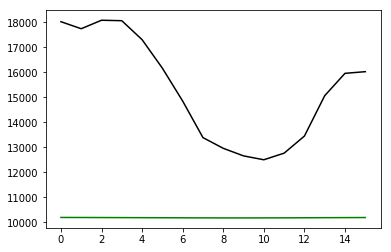

In [201]:
plt.plot(actual_power, color = 'black', label = 'Actual')
plt.plot(pedicted_power, color = 'green', label = 'Predicted')
